In [10]:
import pandas as pd
import numpy as np
df = pd.read_csv("vgsales.csv")
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


# Plotting platform vs global sales

          Global_Sales
Platform              
2600             97.08
3DO               0.10
3DS             247.46
DC               15.97
DS              822.49
GB              255.45
GBA             318.50
GC              199.36
GEN              28.36
GG                0.04
N64             218.88
NES             251.07
NG                1.44
PC              258.82
PCFX              0.03
PS              730.66
PS2            1255.64
PS3             957.84
PS4             278.10
PSP             296.28
PSV              61.93
SAT              33.59
SCD               1.87
SNES            200.05
TG16              0.16
WS                1.42
Wii             926.71
WiiU             81.86
X360            979.96
XB              258.26
XOne            141.06


<AxesSubplot:xlabel='Platform'>

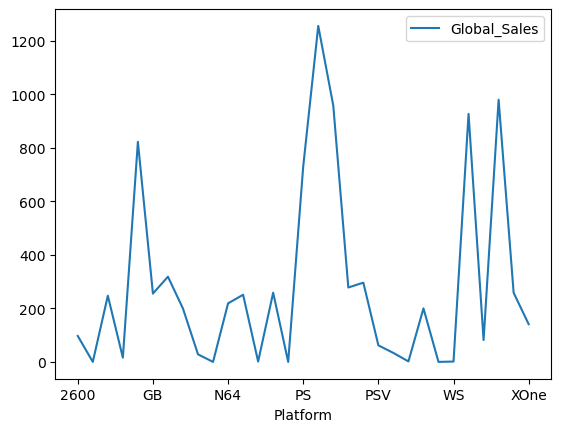

In [12]:
df2 = df.drop(columns = ["Rank","Name","Year","Genre","Publisher","NA_Sales","EU_Sales","JP_Sales","Other_Sales"])
df2 = df2.groupby("Platform").sum()
print(df2)
df2.plot()

In [13]:
df1 = df.drop(columns = ["Rank","Name","Platform","Year","Genre","Publisher"])
df1.head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,41.49,29.02,3.77,8.46,82.74
1,29.08,3.58,6.81,0.77,40.24
2,15.85,12.88,3.79,3.31,35.82
3,15.75,11.01,3.28,2.96,33.00
4,11.27,8.89,10.22,1.00,31.37


# Predicting the global sales on the basis of sales in NA,EU,JP and others.

In [14]:
X = df1.iloc[:,:4]
y = df1.iloc[:,-1]

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)

In [16]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)
acc = model.score(X_test,y_test)
print(f"The coeficients are :- {model.coef_}")
print(f"The intercept is :- {model.intercept_}")
print(acc)

The coeficients are :- [0.99991508 1.00000049 0.99982126 0.99953527]
The intercept is :- 0.0003252496867409693
0.999987961673058


In [17]:
from sklearn.metrics import r2_score
y_train_pred = model.predict(X_train)
acc_train = r2_score(y_train_pred,y_train)
acc_train

0.9999888973796226

In [18]:
y_test_pred = model.predict(X_test)
acc_test = r2_score(y_test,y_test_pred)
acc_test

0.999987961673058